# Hackaton Code/Stage Sony Music 2020

## https://www.codestage.com.br/ 

## Desafio
### Music Business: onde a inteligência amplifica a emoção
### Como a Inteligência Artificial e o Machine Learning podem melhorar a experiência de consumo e impulsionar o mercado da música?

#### Grupo 29 :

*   Anderson Monteiro
*   Carlos Silla
*   Cinthya Oestreich 
*   Priscilla Perks




# Solução Tecnica 
## Engine de Descoberta de novas músicas de artistas pouco conhecidos: 

*   Selecionar 5 artistas famosos;
*   Buscar as músicas e fazer download; 
*   Buscar um pool de artistas fora da bolha main stream;
*   Comparar as músicas dos famosos com as músicas do pool de artistas; 
*   Sugerir as músicas para o Battle. 









In [1]:
# Instalando a bilioteca do Spotify para Python.
# https://developer.spotify.com/documentation/web-api/
!pip install Spotipy

In [2]:
#Importando Bibliotecas 
import json
import pandas as pd
import spotipy
import requests
from spotipy.oauth2 import SpotifyClientCredentials
from collections import OrderedDict
import librosa
import librosa.display
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
import IPython
import IPython.display
import PIL
import os

#### Abaixo é possivel observar a inserção das credenciais e parâmetros. 

In [3]:
# Client ID; copy this from your app created on beta.developer.spotify.com
cid = '71c177e9dd3d4f3f9552f37b9005f0c8'
# Client Secret; copy this from your app
secret = 'bfee0c07315a42a1b7c89074c99a7cd8'  
# Your Spotify username
username = 'cinthyaoestreich' 


# const parameters

# to get genre list:
#GENRE_FILTER = ['acoustic', 'ambient', 'anime', 'edm', 'hip-hop', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'techno', 'trip-hop'] 
GENRE_FILTER = ['rock'] 

# spotify api client_id:
SPOTIFY_CLIENT_ID = '71c177e9dd3d4f3f9552f37b9005f0c8'

# spotify api client_secret:
SPOTIFY_CLIENT_SECRET = 'bfee0c07315a42a1b7c89074c99a7cd8'

# number of get track info per batch:
GET_TRACK_BATCH_NUM = 50                                                                                       

# number of total track info each genre:
GET_TRACK_NUM_PER_GENRE = 100                                                                                 

# parameter check
assert GET_TRACK_NUM_PER_GENRE % GET_TRACK_BATCH_NUM == 0, 'You must set GET_TRACK_NUM_PER_GENRE to number which can be devided by GET_TRACK_BATCH_NUM'

In [4]:
# init
client_id = SPOTIFY_CLIENT_ID
client_secret = SPOTIFY_CLIENT_SECRET
client_credentials_manager = spotipy.oauth2.SpotifyClientCredentials(client_id, client_secret)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [5]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### No exemplo desta engine o desafios abordado será encontrar novos artistas para a cena musical cujo tema é Halloween. Para que nosso sistema inteligente de recomendações personalizadas de novos artistas funcione precisamos que o usuário escolha 5 músicas que ele mais gosta para o tema. 

### No caso da nossa equipe para ilustrar o funcionamento da nossa engine foram escolhidas as músicas abaixo: 



1.   AC/DC - Back in Black - Track ID: 08mG3Y1vljYA6bvDt4Wqkj 
2.   Pink Floyd - Wish you were here -  Track ID: 6mFkJmJqdDVQ1REhVfGgd1
3.   Pearl Jam  - Last Kiss - Track ID: 0QnONzv3TvHAWk294h6DaQ 
4.   Foo Fighters - Best of you - Track ID: 5FZxsHWIvUsmSK1IAvm2pp
5.   System Of A Down - B.Y.O.B - Track ID: 0EYOdF5FCkgOJJla8DI2Md





In [6]:
%cd /content/drive/My Drive/spotify/tracks/top/

/content/drive/My Drive/spotify/tracks/top


In [7]:
# PEGA AS FAIXAS PREFERIDAS, DE ACORDO COM O TEMA

# 1.   AC/DC - Back in Black - Track ID: 08mG3Y1vljYA6bvDt4Wqkj
birdy_uri = 'spotify:artist:711MCceyCBcFnzjGY4Q7Un'
results = spotify.artist_top_tracks(birdy_uri)

for i in results['tracks']:
    if i['preview_url'] != 'None':
        if (i['name'] == 'Back In Black'):
          print(i['name'])
          # save track data
          response = requests.get(i['preview_url'])
          with open("/content/drive/My Drive/spotify/tracks/top/{}.mp3".format(i['name']), 'wb') as saveFile:        
              saveFile.write(response.content)

# 2.   Pink Floyd - Wish You Were Here -  Track ID: 6mFkJmJqdDVQ1REhVfGgd1
birdy_uri = 'spotify:artist:0k17h0D3J5VfsdmQ1iZtE9'
results = spotify.artist_top_tracks(birdy_uri)
for i in results['tracks']:
    if i['preview_url'] != 'None':
        if (i['name'] == 'Wish You Were Here'):
          print(i['name'])
          # save track data
          response = requests.get(i['preview_url'])
          with open("/content/drive/My Drive/spotify/tracks/top/{}.mp3".format(i['name']), 'wb') as saveFile:        
              saveFile.write(response.content)

# 3.   Pearl Jam  - Last Kiss - Track ID: 0QnONzv3TvHAWk294h6DaQ 
birdy_uri = 'spotify:artist:1w5Kfo2jwwIPruYS2UWh56'
results = spotify.artist_top_tracks(birdy_uri)
for i in results['tracks']:
    if i['preview_url'] != 'None':
        if (i['name'] == 'Last Kiss'):
          print(i['name'])
          # save track data
          response = requests.get(i['preview_url'])
          with open("/content/drive/My Drive/spotify/tracks/top/{}.mp3".format(i['name']), 'wb') as saveFile:        
              saveFile.write(response.content)

# 4.   Foo Fighters - Best of You - Track ID: 5FZxsHWIvUsmSK1IAvm2pp
birdy_uri = 'spotify:artist:7jy3rLJdDQY21OgRLCZ9sD'
results = spotify.artist_top_tracks(birdy_uri)
for i in results['tracks']:
    if i['preview_url'] != 'None':
        if (i['name'] == 'Best of You'):
          print(i['name'])
          # save track data
          response = requests.get(i['preview_url'])
          with open("/content/drive/My Drive/spotify/tracks/top/{}.mp3".format(i['name']), 'wb') as saveFile:        
              saveFile.write(response.content)

# 5.   System Of A Down - B.Y.O.B. - Tranck ID: 0EYOdF5FCkgOJJla8DI2Md
birdy_uri = 'spotify:artist:5eAWCfyUhZtHHtBdNk56l1'
results = spotify.artist_top_tracks(birdy_uri)
for i in results['tracks']:
    if i['preview_url'] != 'None':
        if (i['name'] == 'B.Y.O.B.'):
          print(i['name'])
          # save track data
          response = requests.get(i['preview_url'])
          with open("/content/drive/My Drive/spotify/tracks/top/{}.mp3".format(i['name']), 'wb') as saveFile:        
              saveFile.write(response.content)

Back In Black
Wish You Were Here
Last Kiss
Best of You
B.Y.O.B.


In [8]:
base_dir = r'/content/drive/My Drive/spotify'


def get_features (base_dir): 
  folder_list = os.listdir(base_dir)
  print(len(folder_list), "categorias encontradas na base")

  # Cria as listas de categorias, instâncias e rótulos para treinamento
  features=[]
  files_list = os.listdir(os.path.join(base_dir))
  print(files_list)
  aux=[]

  for file_name in files_list:
    x, sr = librosa.load(os.path.join(base_dir,file_name))  
    #Calcula os spectral centroids:
    #Calcula o zero_Crossing na musica inteira: 
    #aux.append(x)     
    zero_crossings = librosa.zero_crossings(x, pad=False)
    zcr = sum(zero_crossings)    
    aux.append(zcr)
    #Calcula os spectral centroids:
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)      
    #Obtem a media:
    spect_mean = np.mean(spectral_centroids)
    aux.append(spect_mean)
    #Obtem o desvio padrao:
    spect_std = np.std(spectral_centroids)
    aux.append(spect_std)
    #Calcula os spectral rolloff:
    spectral_rolloff = librosa.feature.spectral_centroid(x, sr=sr)      
    #Obtem a media:
    spect_rolloff_mean = np.mean(spectral_rolloff)
    aux.append(spect_rolloff_mean)
    #Obtem o desvio padrao:
    spect_rolloff_std = np.std(spectral_rolloff)
    aux.append(spect_rolloff_std)
    features.append(aux)
    aux=[]
  return features,files_list


In [9]:
#Médias de centroides de músicas famosas .
top_features, top_list= get_features(r'/content/drive/My Drive/spotify/tracks/top')

mean_top_features= [0,0,0,0,0]
mean_top_features[0]= np.mean(top_features[0])
mean_top_features[1]= np.mean(top_features[1])
mean_top_features[2]= np.mean(top_features[2])
mean_top_features[3]= np.mean(top_features[3])
mean_top_features[4]= np.mean(top_features[4])

print(top_features,top_list)
print(mean_top_features)

5 categorias encontradas na base
['Back In Black.mp3', 'Wish You Were Here.mp3', 'Last Kiss.mp3', 'Best of You.mp3', 'B.Y.O.B..mp3']
[[102632, 2589.8288036345016, 378.6961062452879, 2589.8288036345016, 378.6961062452879], [51826, 1925.882903707271, 508.86723631255046, 1925.882903707271, 508.86723631255046], [65748, 2036.851289497078, 762.9084410886803, 2036.851289497078, 762.9084410886803], [88810, 2431.2388854018063, 452.1512658274983, 2431.2388854018063, 452.1512658274983], [104362, 2781.939576895772, 496.2846139211878, 2781.939576895772, 496.2846139211878]] ['Back In Black.mp3', 'Wish You Were Here.mp3', 'Last Kiss.mp3', 'Best of You.mp3', 'B.Y.O.B..mp3']
[21713.809963951917, 11339.10005600793, 14269.503892234305, 18915.356060491722, 22183.689676326787]


In [10]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import sys
import pprint
import json

clientId = '71c177e9dd3d4f3f9552f37b9005f0c8'
clientSecret = 'bfee0c07315a42a1b7c89074c99a7cd8'
clientRedirect = 'http://localhost:8888/callback'

search_str = 'genre:rock AND tag:hipster AND year:2018-2020'

sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(clientId, clientSecret))

result = sp.search(search_str,10,0,'artist')

pprint.pprint(result['artists']['items'][0]['name']) 
pprint.pprint(result['artists']['items'][0]['id'])
pprint.pprint(result['artists']['items'][1]['name'])
pprint.pprint(result['artists']['items'][1]['id'])
pprint.pprint(result['artists']['items'][2]['name'])
pprint.pprint(result['artists']['items'][2]['id'])
pprint.pprint(result['artists']['items'][3]['name'])
pprint.pprint(result['artists']['items'][3]['id'])
pprint.pprint(result['artists']['items'][4]['name'])
pprint.pprint(result['artists']['items'][4]['id'])

#pprint.pprint(result)

'After Aristotle'
'5I3dBbhvIt4jFvHp3lz1gy'
'Wreck Loose'
'2ttghNE0zftHBLJqqa4PJe'
'Seeds'
'5UGxwLICm61VglRaV4N5aA'
'Ghosts of Jupiter'
'0k1toV59eTbUIykvDaXv1N'
'Think No Think'
'04NFnv6EyZaL4lnZYGFCoD'


In [11]:
%cd /content/drive/My Drive/spotify/tracks/unpop

/content/drive/My Drive/spotify/tracks/unpop


In [12]:
# PEGA AS MELHORES FAIXAS DO PRIMEIRO ARTISTA MENOS POPULAR
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Seeds
birdy_uri = 'spotify:artist:5UGxwLICm61VglRaV4N5aA'

results = spotify.artist_top_tracks(birdy_uri)
for i in results['tracks']:
  if i['preview_url'] != 'None':
    try:
      response = requests.get(i['preview_url'])
      pprint.pprint(i['name'])
      with open("/content/drive/My Drive/spotify/tracks/unpop/{}.mp3".format(i['name']+' - '+ i['artists'][0]['name']), 'wb') as saveFile:        
        saveFile.write(response.content)
    except:
      pprint.pprint('erro')

'Parable Song'
'Meditaions Of A Broken Heart'
'Love Song 45'
'Sweet Lord'
'Anything'
'Never Be The Same'
'Spirit (I. Hyparchón, II. Rûah, III. Shãmayim, IV. Yeshimon)'
'What Could Be So Grand'
'Blue Waters'
'Remember The Chains'


In [13]:
# PEGA AS MELHORES FAIXAS DO SEGUNDO ARTISTA MENOS POPULAR
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Ghosts of Jupiter
birdy_uri = 'spotify:artist:0k1toV59eTbUIykvDaXv1N'

results = spotify.artist_top_tracks(birdy_uri)
for i in results['tracks']:
  if i['preview_url'] != 'None':
    try:
      response = requests.get(i['preview_url'])
      pprint.pprint(i['name'])
      with open("/content/drive/My Drive/spotify/tracks/unpop/{}.mp3".format(i['name']+' - '+ i['artists'][0]['name']), 'wb') as saveFile:        
        saveFile.write(response.content)
    except:
      pprint.pprint('erro')

'Boundless Time I'
'The Great Bright Horses'
'Shelter'
'Paper Roses'
'The Undertaking'
'Yellow Woman'
'Lyra'
'Trample On Daisies'
'Play It Blind'
'Towers'


In [14]:
# PEGA AS MELHORES FAIXAS DO TERCEIRO ARTISTA MENOS POPULAR
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


#Norman Nardini
birdy_uri = 'spotify:artist:01na2FFsW2ckfKuYiCD05S'

results = spotify.artist_top_tracks(birdy_uri)
for i in results['tracks']:
  if i['preview_url'] != 'None':
    try:
      response = requests.get(i['preview_url'])
      pprint.pprint(i['name'])
      with open("/content/drive/My Drive/spotify/tracks/unpop/{}.mp3".format(i['name']+' - '+ i['artists'][0]['name']), 'wb') as saveFile:        
        saveFile.write(response.content)
    except:
      pprint.pprint('erro')

'Smoke Two Joints'
'Smoke Two Joints'
'High Times'
'Love Dog'
'High Times'
'Rock And Roll City'
"Good Rockin' Man"
"Burnin' Up"
'That Girl'
'Ready Freddy'


In [15]:
# PEGA AS MELHORES FAIXAS DO QUARTO ARTISTA MENOS POPULAR
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Think No Think
birdy_uri = 'spotify:artist:04NFnv6EyZaL4lnZYGFCoD'

results = spotify.artist_top_tracks(birdy_uri)
for i in results['tracks']:
  if i['preview_url'] != 'None':
    try:
      response = requests.get(i['preview_url'])
      pprint.pprint(i['name'])
      with open("/content/drive/My Drive/spotify/tracks/unpop/{}.mp3".format(i['name']+' - '+ i['artists'][0]['name']), 'wb') as saveFile:        
        saveFile.write(response.content)
    except:
      pprint.pprint('erro')  

'Clozer'
'Start a War'
'Nothing Really Matters'
'Strange Truth'
'Silent City'
'Take a Little for Your Mind'
'Cold Grey Sun'
'It Comes and Goes'
"70's Era Mood Lighting"
'432 Dreams'


In [16]:
# PEGA AS MELHORES FAIXAS DO QUINTO ARTISTA MENOS POPULAR
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Bloodshed
birdy_uri = 'spotify:artist:0D0L0K1pwBTMCAQwg4eatw'

results = spotify.artist_top_tracks(birdy_uri)
for i in results['tracks']:
  if i['preview_url'] != 'None':
    try:
      response = requests.get(i['preview_url'])
      pprint.pprint(i['name'])
      with open("/content/drive/My Drive/spotify/tracks/unpop/{}.mp3".format(i['name']+' - '+ i['artists'][0]['name']), 'wb') as saveFile:        
        saveFile.write(response.content)
    except:
      pprint.pprint('erro')

'erro'
'Armageddon'
'The Portrait of Sufferings'
'Cannibal Party Messiahs'
'And so We March'
'Antagonism Inside'
'Rising'
'The Arrival'
'Path of Redemption'
'Deliverance Through Punishment'


In [17]:
#Lista de centroides de artistas fora da bolha
up_artist_features, up_artist_name = get_features(r"/content/drive/My Drive/spotify/tracks/unpop")


47 categorias encontradas na base
['Parable Song - Seeds.mp3', 'Meditaions Of A Broken Heart - Seeds.mp3', 'Love Song 45 - Seeds.mp3', 'Sweet Lord - Seeds.mp3', 'Anything - Seeds.mp3', 'Never Be The Same - Seeds.mp3', 'Spirit (I. Hyparchón, II. Rûah, III. Shãmayim, IV. Yeshimon) - Seeds.mp3', 'What Could Be So Grand - Seeds.mp3', 'Blue Waters - Seeds.mp3', 'Remember The Chains - Seeds.mp3', 'Boundless Time I - Ghosts of Jupiter.mp3', 'The Great Bright Horses - Ghosts of Jupiter.mp3', 'Shelter - Ghosts of Jupiter.mp3', 'Paper Roses - Ghosts of Jupiter.mp3', 'The Undertaking - Ghosts of Jupiter.mp3', 'Yellow Woman - Ghosts of Jupiter.mp3', 'Lyra - Ghosts of Jupiter.mp3', 'Trample On Daisies - Ghosts of Jupiter.mp3', 'Play It Blind - Ghosts of Jupiter.mp3', 'Towers - Ghosts of Jupiter.mp3', 'Smoke Two Joints - Norman Nardini.mp3', 'High Times - Norman Nardini.mp3', 'Love Dog - Norman Nardini.mp3', 'Rock And Roll City - Norman Nardini.mp3', "Good Rockin' Man - Norman Nardini.mp3", "Burn

### Para este projeto vamos calcular a distancia dos centroides de cada música famosa e comparar com as músicas menos conhecidas. 
### Para a aplicação real existem várias formas de realizar a comparação. Entre estás técnicas podemos usar o K-Means. 

In [18]:
data = {'Nome da Música': [" "], 'Similaridade Musical': [0]}
df = pd.DataFrame(data=data)
print(df)

  Nome da Música  Similaridade Musical
0                                    0


In [19]:
def euclidianDistance(a,b):
  point1 = np.array(a) 
  point2 = np.array(b) 
  dist = np.linalg.norm(point1 - point2) 
  return dist

aux=0
list_centr=[]

for i in range(len(up_artist_features)): 
  aux = euclidianDistance(up_artist_features[i],mean_top_features)
  df.loc[i]=[up_artist_name[i], aux]
  aux=0

df.sort_values(by=['Similaridade Musical'],inplace=True)
print(df)



                                       Nome da Música  Similaridade Musical
37                    432 Dreams - Think No Think.mp3          33625.143048
1            Meditaions Of A Broken Heart - Seeds.mp3          39851.500298
28                        Clozer - Think No Think.mp3          42175.476568
11    The Great Bright Horses - Ghosts of Jupiter.mp3          42596.236921
19                     Towers - Ghosts of Jupiter.mp3          42755.957857
13                Paper Roses - Ghosts of Jupiter.mp3          43768.343679
17         Trample On Daisies - Ghosts of Jupiter.mp3          44042.807174
14            The Undertaking - Ghosts of Jupiter.mp3          45056.606940
36        70's Era Mood Lighting - Think No Think.mp3          45288.015721
10           Boundless Time I - Ghosts of Jupiter.mp3          45981.904184
15               Yellow Woman - Ghosts of Jupiter.mp3          48740.506550
9                     Remember The Chains - Seeds.mp3          49812.038936
12          

# 1º Posição: 432 Dreams - Think No Think

In [20]:
import IPython.display as ipd
ipd.Audio("/content/drive/My Drive/spotify/tracks/unpop/432 Dreams - Think No Think.mp3")


# 2º Posição: Meditaions Of A Broken Heart - Seeds 

In [21]:
import IPython.display as ipd
ipd.Audio("/content/drive/My Drive/spotify/tracks/unpop/Meditaions Of A Broken Heart - Seeds.mp3")

# 3º Posição: Clozer - Think No Think 

In [22]:
import IPython.display as ipd
ipd.Audio("/content/drive/My Drive/spotify/tracks/unpop/Clozer - Think No Think.mp3")

# 4º Posição:  The Great Bright Horses - Ghosts of Jupiter

In [23]:
import IPython.display as ipd
ipd.Audio("/content/drive/My Drive/spotify/tracks/unpop/The Great Bright Horses - Ghosts of Jupiter.mp3")

# 5º Posição:  Towers - Ghosts of Jupiter

In [24]:
import IPython.display as ipd
ipd.Audio("/content/drive/My Drive/spotify/tracks/unpop/Towers - Ghosts of Jupiter.mp3")

# Conclusão 
## Esse notebook é uma MVP da engine da solução para o Hackaton Code/Stage Sony Music 2020. Lembrando que tudo que foi aplicado pode ser utilzado na Plataforma AWS utilizando o SageMaker, S3 e Container Registry. 

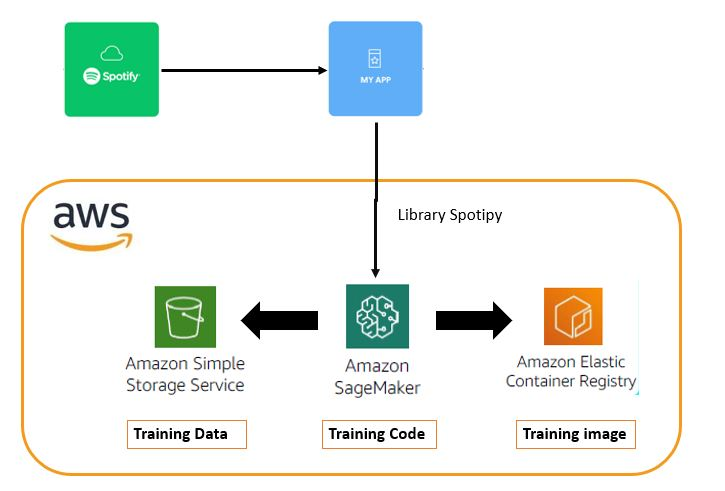

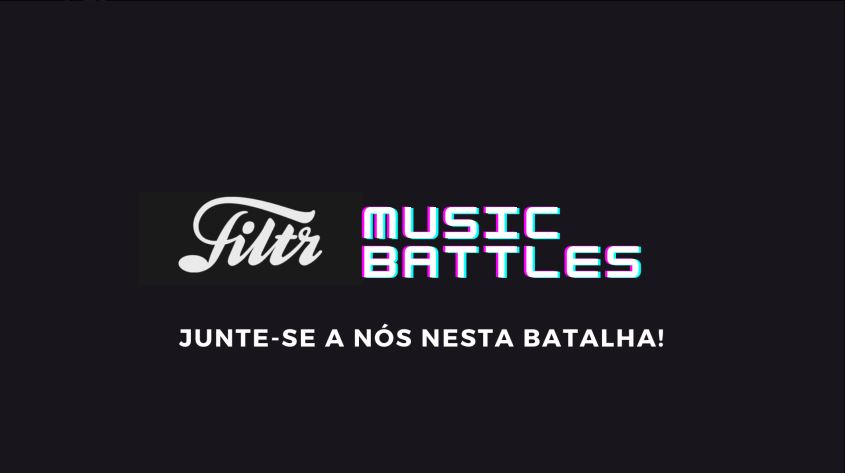